In [1]:
import sys
sys.path.append('/Users/erikweilandt/Library/Caches/pypoetry/virtualenvs/tepem-FeojsIC2-py3.11/lib/python3.11/site-packages')

In [2]:
from sympy import symbols, simplify, prod, plot, diff, expand, integrate, solveset
from sympy.plotting.plot import plot3d
import numpy as np

In [3]:
def LagrangPoly(y,order,i,yi=None):
    if yi==None:
        yi=symbols('y:%d'%(order+1))
    index = list(range(order+1))
    index.pop(i)
    return prod([(y-yi[j])/(yi[i]-yi[j]) for j in index])

reference: https://www.longqi.cf/python/2014/03/24/implement-of-lagrange-polynomial-in-sympy/

In [4]:
test_order = 2
test_nodes = np.linspace(0,1, test_order+1)

In [5]:
x, y, s=symbols('x y s')
LagrangPoly(y,test_order,0)

(y - y1)*(y - y2)/((y0 - y1)*(y0 - y2))

## Define 1-D $\mathbb{P}_d$ shape functions in both directions

In [6]:
order_x = 2
order_y = 5

In [7]:
def get_chebby_points(start, end, num):
    ref_points = [-np.cos(np.pi * i / num) for i in range(num+1)]
    interval_points = [map_min1plus1_to_ab(x, start, end) for x in ref_points]
    return np.array(interval_points)

def map_min1plus1_to_ab(x,a, b):
    return (b-a)/2 * x + (a+b)/2

cheby_points = True

In [8]:
nodes_x = np.linspace(0,1, order_x+1)
nodes_y = np.linspace(0,1, order_y+1)

In [9]:
if cheby_points:
    nodes_x = get_chebby_points(0,1, order_x)
    nodes_y = get_chebby_points(0,1, order_y)

In [10]:
pols_x = {}
for i in range(order_x+1):
    pols_x[f"psi_{i}"] = simplify(LagrangPoly(x,order_x,i,list(nodes_x)))
pols_y = {}
for i in range(order_y+1):
    pols_y[f"xi_{i}"] = simplify(LagrangPoly(y,order_y,i,list(nodes_y)))
pols_x, pols_y

({'psi_0': 1.0*(x - 1)*(2.0*x - 1.0),
  'psi_1': 4.0*x*(1 - x),
  'psi_2': x*(2.0*x - 1.0)},
 {'xi_0': -51.2*y**5 + 153.6*y**4 - 169.6*y**3 + 83.2*y**2 - 17.0*y + 1.0,
  'xi_1': 11.5777087639997*y*(y - 1)*(1.23606797749979*y - 1.11803398874989)*(1.78885438199983*y - 1.17082039324994)*(4.0*y - 1.38196601125011),
  'xi_2': y*(-102.4*y**4 + 271.821670111997*y**3 - 245.287922695995*y**2 + 81.6551069659978*y - 5.78885438199983),
  'xi_3': 4.42229123600034*y*(y - 1)*(1.78885438199983*y - 0.170820393249937)*(3.23606797749979*y - 1.11803398874989)*(4.0*y - 3.61803398874989),
  'xi_4': y*(-102.4*y**4 + 214.578329888003*y**3 - 145.112077304005*y**2 + 35.1448930340022*y - 2.21114561800017),
  'xi_5': y*(51.2*y**4 - 102.4*y**3 + 67.2*y**2 - 16.0*y + 1.0)})

In [11]:
#for pol in pols_x.values():
#    plot(pol, (x,0,1))

In [12]:
#for pol in pols_y.values():
#    plot(pol, (y,0,1))

# $\mathbb{Q}_{x,y}$ shape functions

Below we are numerating such that we follow the numbering as indicated in the notes. This means we first number all shape functions for x=0 and at last all shape functions with x=1.

In [13]:
q_sf = {}
name_counter = 0
for x_sf in pols_x.values():
    for y_sf in pols_y.values():
        q_sf[f"phi_{name_counter}"] = x_sf * y_sf
        name_counter += 1
#q_sf

{'phi_0': 1.0*(x - 1)*(2.0*x - 1.0)*(-51.2*y**5 + 153.6*y**4 - 169.6*y**3 + 83.2*y**2 - 17.0*y + 1.0),
 'phi_1': 11.5777087639997*y*(x - 1)*(2.0*x - 1.0)*(y - 1)*(1.23606797749979*y - 1.11803398874989)*(1.78885438199983*y - 1.17082039324994)*(4.0*y - 1.38196601125011),
 'phi_2': 1.0*y*(x - 1)*(2.0*x - 1.0)*(-102.4*y**4 + 271.821670111997*y**3 - 245.287922695995*y**2 + 81.6551069659978*y - 5.78885438199983),
 'phi_3': 4.42229123600034*y*(x - 1)*(2.0*x - 1.0)*(y - 1)*(1.78885438199983*y - 0.170820393249937)*(3.23606797749979*y - 1.11803398874989)*(4.0*y - 3.61803398874989),
 'phi_4': 1.0*y*(x - 1)*(2.0*x - 1.0)*(-102.4*y**4 + 214.578329888003*y**3 - 145.112077304005*y**2 + 35.1448930340022*y - 2.21114561800017),
 'phi_5': 1.0*y*(x - 1)*(2.0*x - 1.0)*(51.2*y**4 - 102.4*y**3 + 67.2*y**2 - 16.0*y + 1.0),
 'phi_6': 4.0*x*(1 - x)*(-51.2*y**5 + 153.6*y**4 - 169.6*y**3 + 83.2*y**2 - 17.0*y + 1.0),
 'phi_7': 46.3108350559987*x*y*(1 - x)*(y - 1)*(1.23606797749979*y - 1.11803398874989)*(1.78885438

In [14]:
q_sf_velo = {}
name_counter = 0
for i, x_sf in enumerate(pols_x.values()):
    for j, y_sf in enumerate(pols_y.values()):
        if j%order_y != 0:
            q_sf_velo[f"phi_{name_counter}"] = x_sf * y_sf
            name_counter += 1
q_sf_velo

{'phi_0': 11.5777087639997*y*(x - 1)*(2.0*x - 1.0)*(y - 1)*(1.23606797749979*y - 1.11803398874989)*(1.78885438199983*y - 1.17082039324994)*(4.0*y - 1.38196601125011),
 'phi_1': 1.0*y*(x - 1)*(2.0*x - 1.0)*(-102.4*y**4 + 271.821670111997*y**3 - 245.287922695995*y**2 + 81.6551069659978*y - 5.78885438199983),
 'phi_2': 4.42229123600034*y*(x - 1)*(2.0*x - 1.0)*(y - 1)*(1.78885438199983*y - 0.170820393249937)*(3.23606797749979*y - 1.11803398874989)*(4.0*y - 3.61803398874989),
 'phi_3': 1.0*y*(x - 1)*(2.0*x - 1.0)*(-102.4*y**4 + 214.578329888003*y**3 - 145.112077304005*y**2 + 35.1448930340022*y - 2.21114561800017),
 'phi_4': 46.3108350559987*x*y*(1 - x)*(y - 1)*(1.23606797749979*y - 1.11803398874989)*(1.78885438199983*y - 1.17082039324994)*(4.0*y - 1.38196601125011),
 'phi_5': 4.0*x*y*(1 - x)*(-102.4*y**4 + 271.821670111997*y**3 - 245.287922695995*y**2 + 81.6551069659978*y - 5.78885438199983),
 'phi_6': 17.6891649440014*x*y*(1 - x)*(y - 1)*(1.78885438199983*y - 0.170820393249937)*(3.23606797

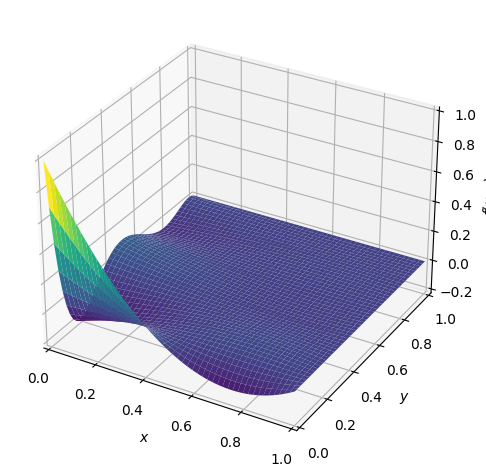

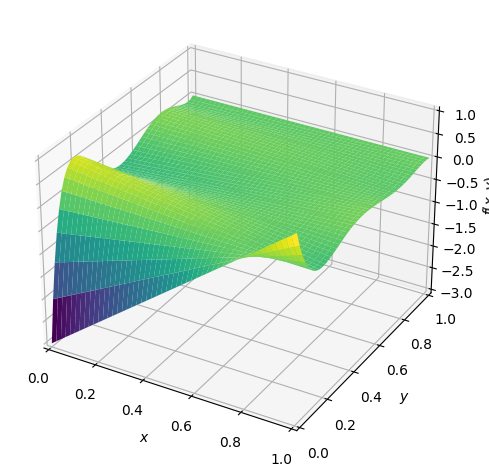

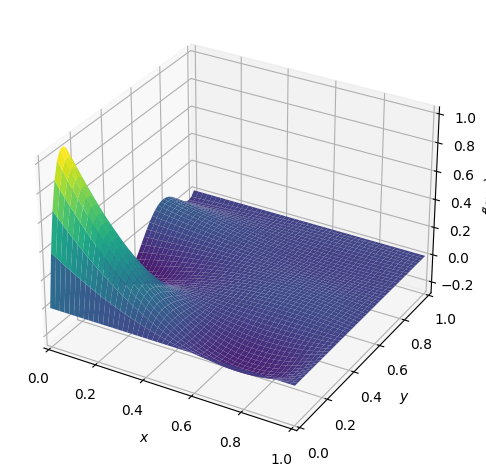

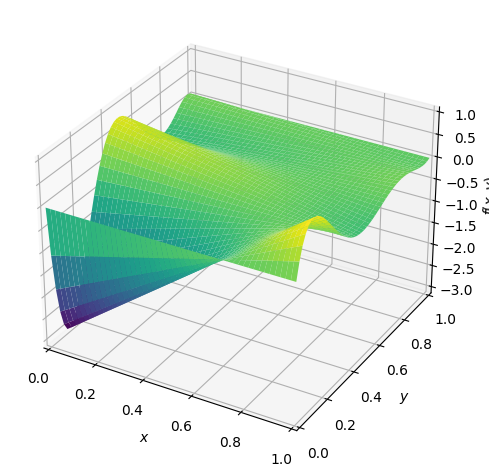

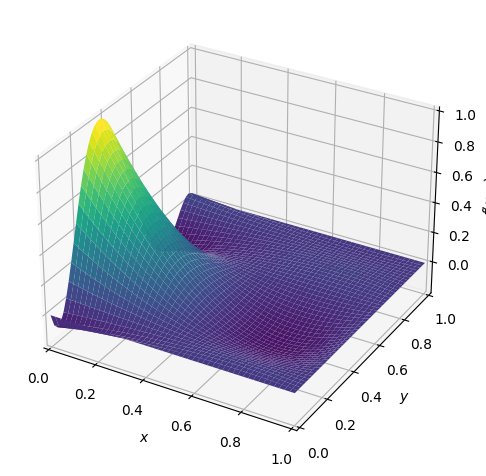

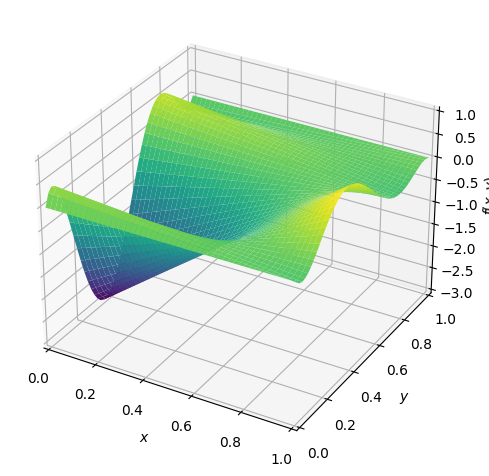

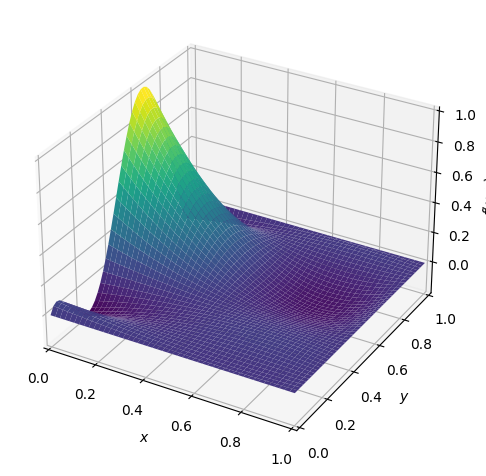

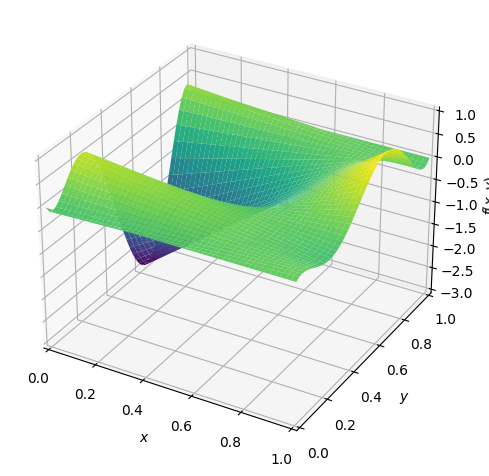

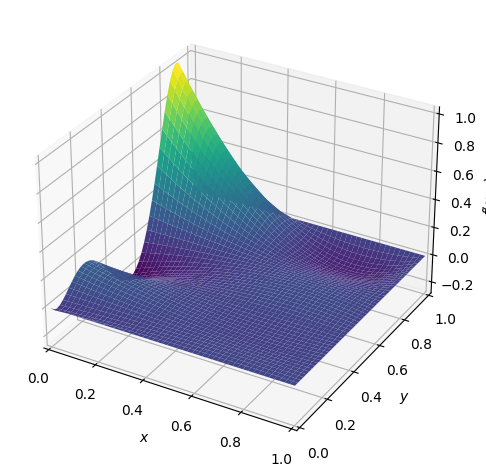

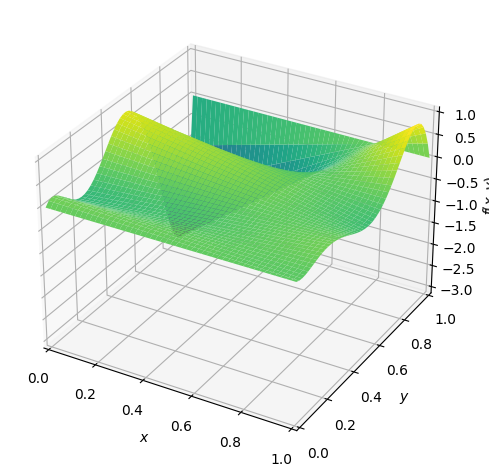

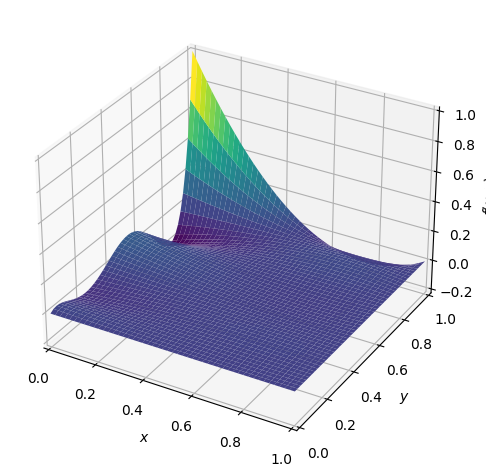

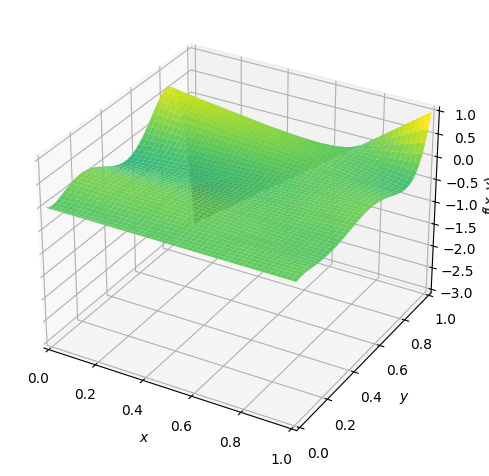

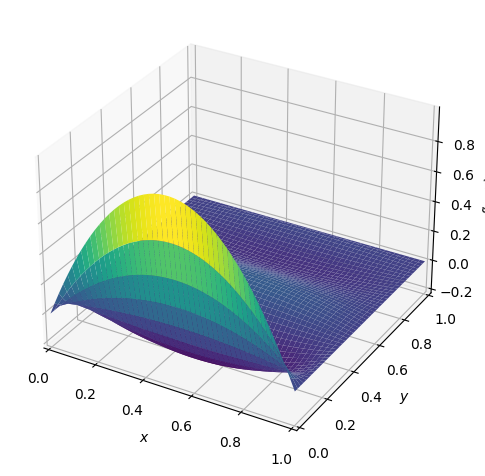

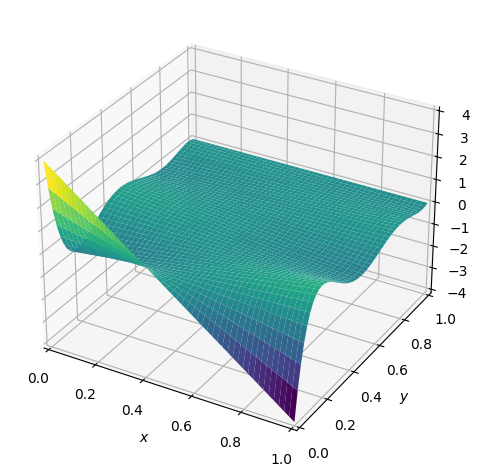

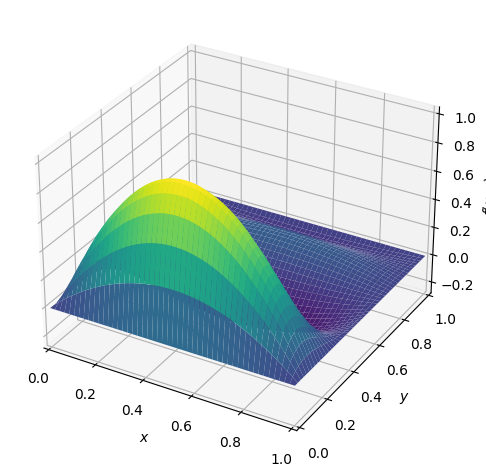

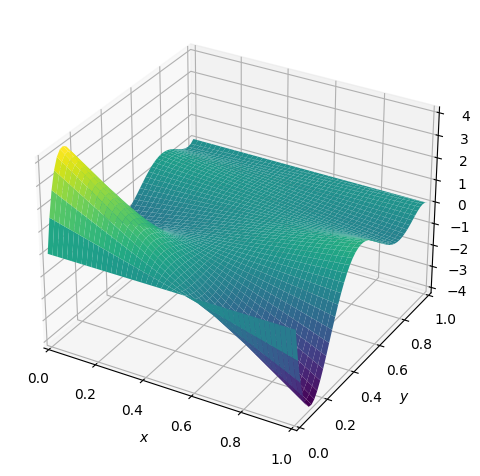

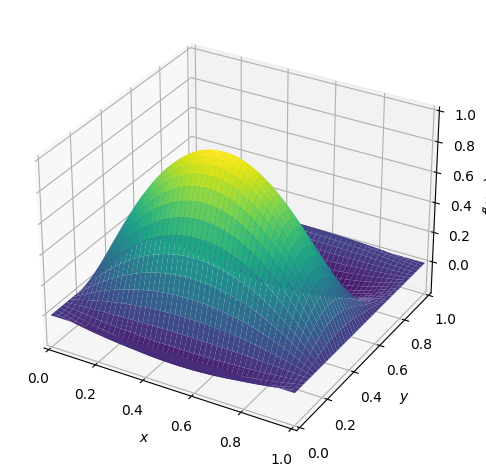

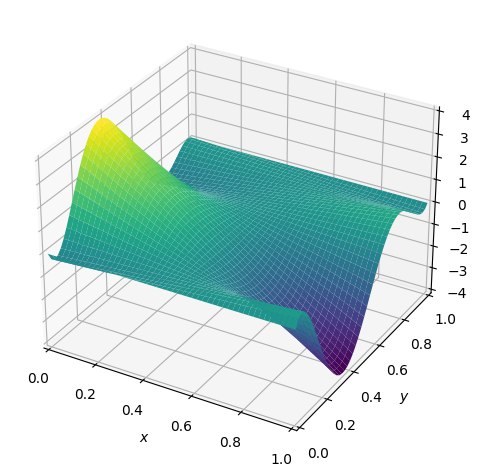

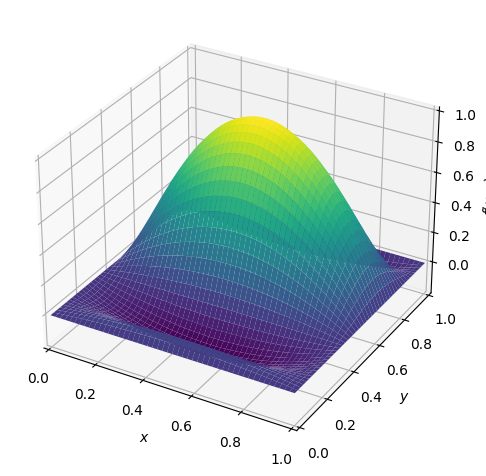

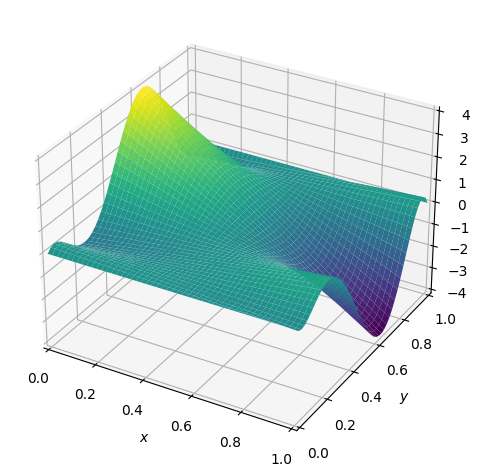

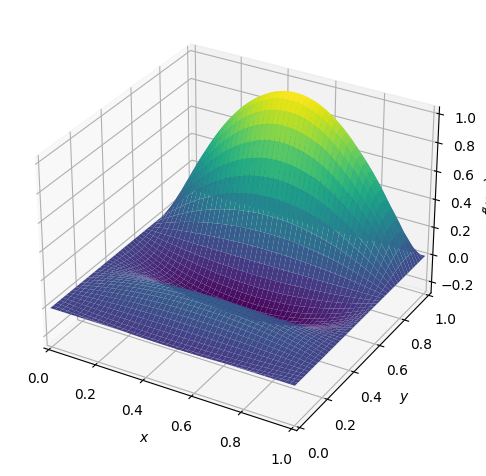

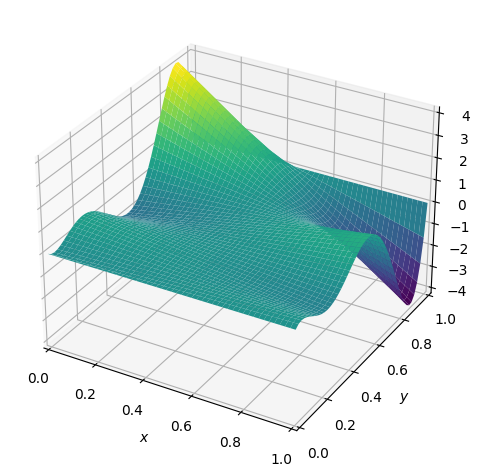

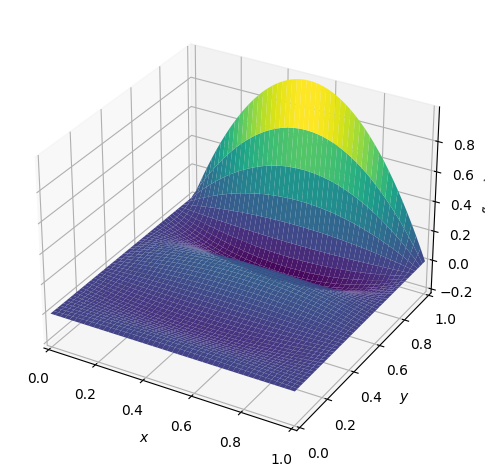

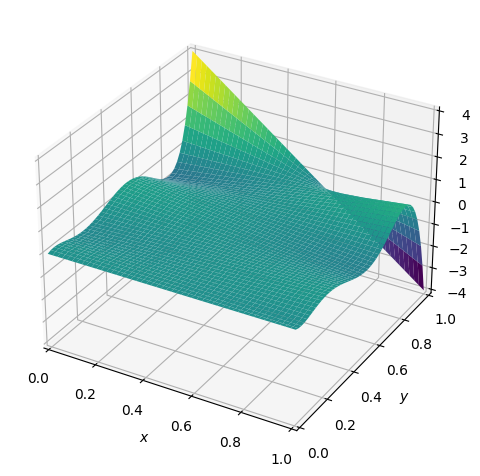

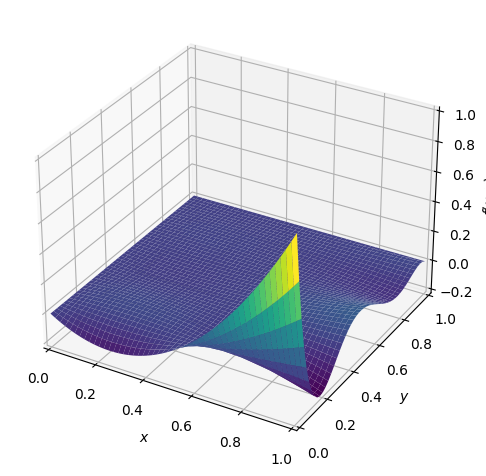

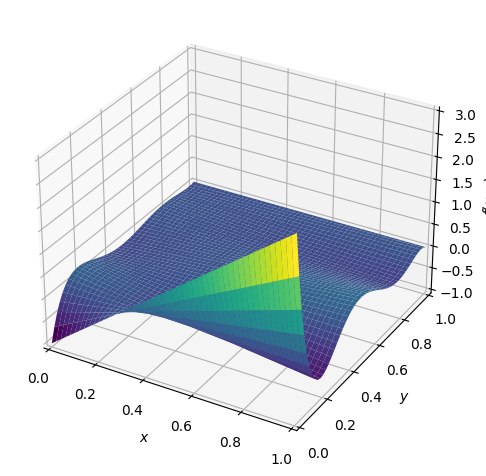

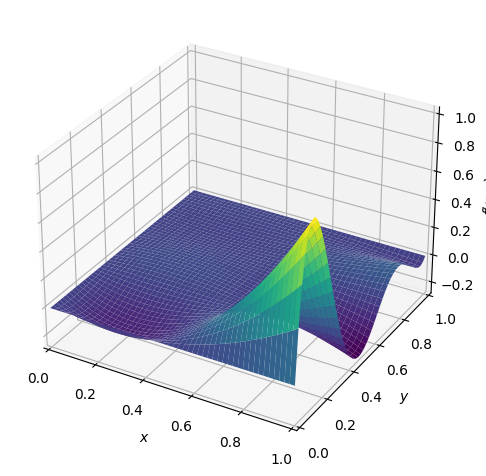

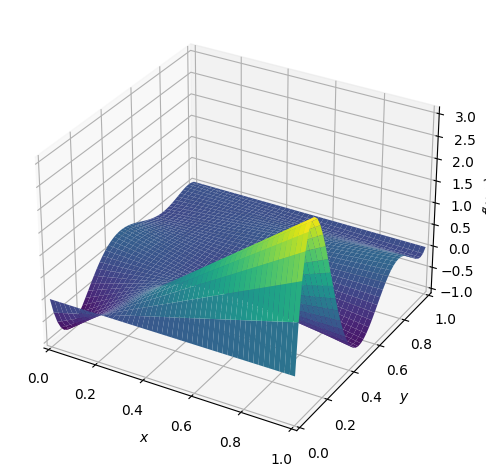

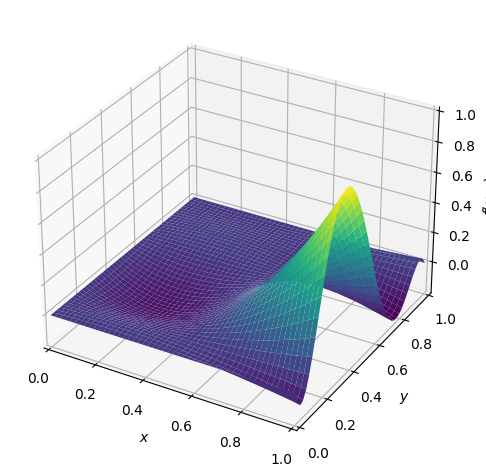

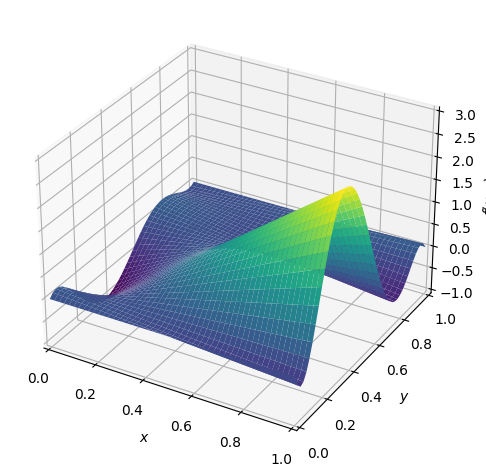

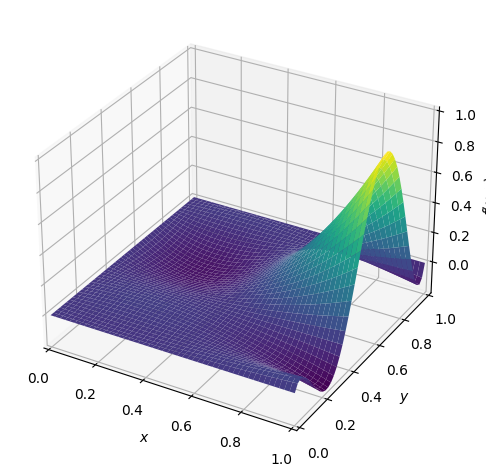

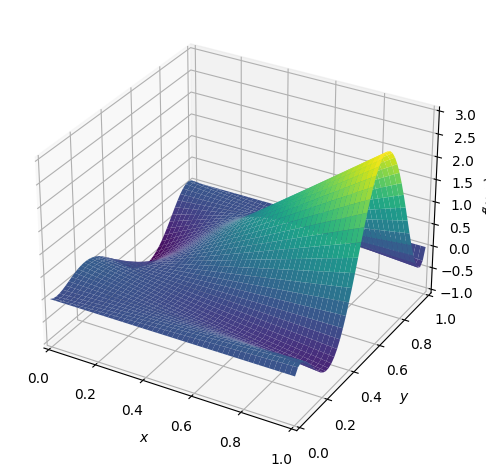

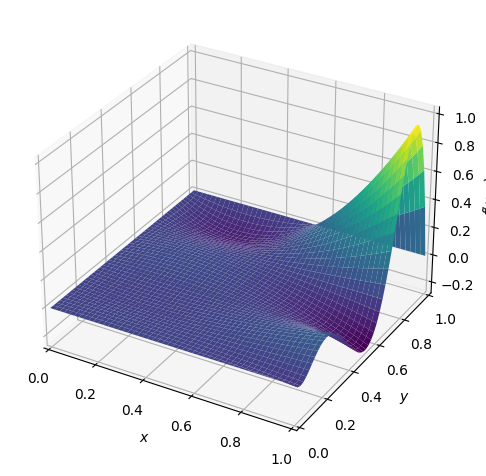

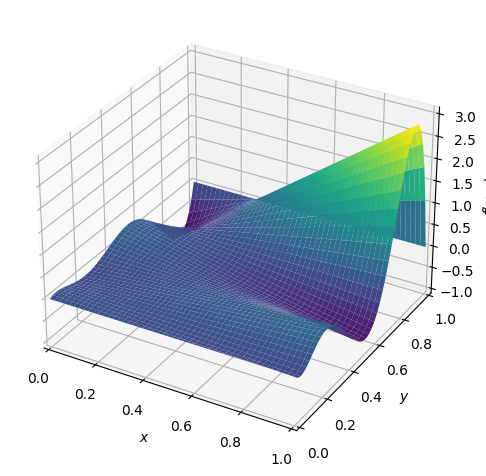

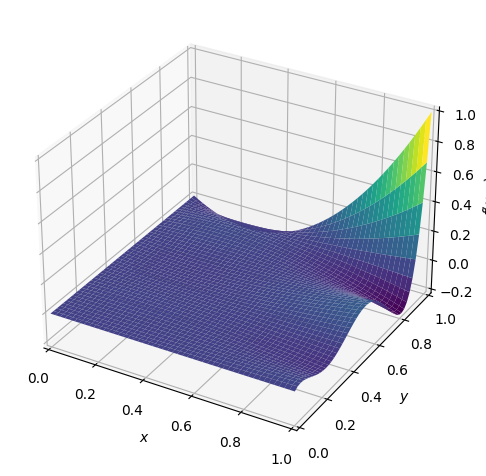

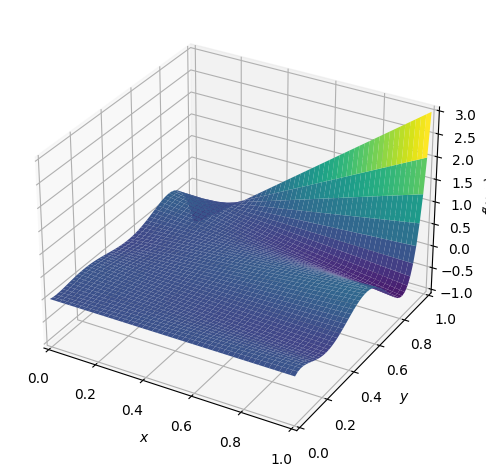

In [15]:
#for pol in q_sf.values():
#    plot3d(pol,(x,0,1), (y,0,1))
#    plot3d(diff(pol,x),(x,0,1), (y,0,1))

### Testing numeration

In [16]:
# check if the correct nodes are == 1
#for i in range(order_y-1):
#    assert q_sf_velo[f"phi_{i}"].subs([(x,0), (y,nodes_y[i+1])]) < 1+10e-10 and q_sf_velo[f"phi_{i}"].subs([(x,0), (y,nodes_y[i+1])]) > 1-10e-10, f"Node {i} is wrong"
#    assert q_sf_velo[f"phi_{i+order_y-1}"].subs([(x,0.5), (y,nodes_y[i+1])]) < 1+10e-10 and q_sf_velo[f"phi_{i+order_y-1}"].subs([(x,0.5), (y,nodes_y[i+1])]) > 1-10e-10, f"Node {i+order_y-1} is wrong"
#    assert q_sf_velo[f"phi_{i+2*(order_y-1)}"].subs([(x,1), (y,nodes_y[i+1])]) < 1+10e-10 and q_sf_velo[f"phi_{i+2*(order_y-1)}"].subs([(x,1), (y,nodes_y[i+1])]) > 1-10e-10, f"Node {i+2*(order_y-1)} is wrong"

__________________________________________________________________________________________________________________

In [17]:
grad_q = {}
for i, sf in enumerate(q_sf.values()):
    grad_x = diff(sf, x)
    grad_y = diff(sf, y)
    grad_q[f"grad_phi_{i}"] = (grad_x, grad_y)
#grad_q

In [18]:
grad_q_velo = {}
for i, sf in enumerate(q_sf_velo.values()):
    grad_x = diff(sf, x)
    grad_y = diff(sf, y)
    grad_q_velo[f"grad_phi_{i}"] = (grad_x, grad_y)
#grad_q_velo

## Printing in function form for script input

In [19]:
# Printing all shape functions
for sf_name, sf in q_sf.items():
    def_header = f"def {sf_name}(x: float, y: float) -> float:\n"
    body = f"\treturn {sf}"
    #print(def_header + body)

In [20]:
# Printing only velocity shape functions: leaving out the boundary shape functions
for sf_name, sf in q_sf_velo.items():
    def_header = f"def {sf_name}(x: float, y: float) -> float:\n"
    body = f"\treturn {sf}"
    print(def_header + body)

def phi_0(x: float, y: float) -> float:
	return 11.5777087639997*y*(x - 1)*(2.0*x - 1.0)*(y - 1)*(1.23606797749979*y - 1.11803398874989)*(1.78885438199983*y - 1.17082039324994)*(4.0*y - 1.38196601125011)
def phi_1(x: float, y: float) -> float:
	return 1.0*y*(x - 1)*(2.0*x - 1.0)*(-102.4*y**4 + 271.821670111997*y**3 - 245.287922695995*y**2 + 81.6551069659978*y - 5.78885438199983)
def phi_2(x: float, y: float) -> float:
	return 4.42229123600034*y*(x - 1)*(2.0*x - 1.0)*(y - 1)*(1.78885438199983*y - 0.170820393249937)*(3.23606797749979*y - 1.11803398874989)*(4.0*y - 3.61803398874989)
def phi_3(x: float, y: float) -> float:
	return 1.0*y*(x - 1)*(2.0*x - 1.0)*(-102.4*y**4 + 214.578329888003*y**3 - 145.112077304005*y**2 + 35.1448930340022*y - 2.21114561800017)
def phi_4(x: float, y: float) -> float:
	return 46.3108350559987*x*y*(1 - x)*(y - 1)*(1.23606797749979*y - 1.11803398874989)*(1.78885438199983*y - 1.17082039324994)*(4.0*y - 1.38196601125011)
def phi_5(x: float, y: float) -> float:
	re

In [21]:
# Printing all gradient shape functions
for sf_name, sf in grad_q.items():
    def_header = f"def {sf_name}(x: float, y: float) -> npt.NDArray[np.float64]:\n"
    body = f"\tphi_dx = {sf[0]}\n\tphi_dy = {sf[1]}\n"
    return_str = f"\treturn np.array([phi_dx, phi_dy])"
    #print(def_header + body + return_str)

In [22]:
# Print velocity dof: leaving out the gradiants of shape function on the boundary
for sf_name, sf in grad_q_velo.items():
    def_header = f"def {sf_name}(x: float, y: float) -> npt.NDArray[np.float64]:\n"
    body = f"\tphi_dx = {sf[0]}\n\tphi_dy = {sf[1]}\n"
    return_str = f"\treturn np.array([phi_dx, phi_dy])"
    print(def_header + body + return_str)

def grad_phi_0(x: float, y: float) -> npt.NDArray[np.float64]:
	phi_dx = 23.1554175279993*y*(x - 1)*(y - 1)*(1.23606797749979*y - 1.11803398874989)*(1.78885438199983*y - 1.17082039324994)*(4.0*y - 1.38196601125011) + 11.5777087639997*y*(2.0*x - 1.0)*(y - 1)*(1.23606797749979*y - 1.11803398874989)*(1.78885438199983*y - 1.17082039324994)*(4.0*y - 1.38196601125011)
	phi_dy = 46.3108350559987*y*(x - 1)*(2.0*x - 1.0)*(y - 1)*(1.23606797749979*y - 1.11803398874989)*(1.78885438199983*y - 1.17082039324994) + 20.7108350559987*y*(x - 1)*(2.0*x - 1.0)*(y - 1)*(1.23606797749979*y - 1.11803398874989)*(4.0*y - 1.38196601125011) + 14.3108350559987*y*(x - 1)*(2.0*x - 1.0)*(y - 1)*(1.78885438199983*y - 1.17082039324994)*(4.0*y - 1.38196601125011) + 11.5777087639997*y*(x - 1)*(2.0*x - 1.0)*(1.23606797749979*y - 1.11803398874989)*(1.78885438199983*y - 1.17082039324994)*(4.0*y - 1.38196601125011) + 11.5777087639997*(x - 1)*(2.0*x - 1.0)*(y - 1)*(1.23606797749979*y - 1.11803398874989)*(1.78885438199983*y -

# Checking integral

In [ ]:
p_sf = {'phi_0': -2.0*x*y**2 + 3.0*x*y - 1.0*x + 2.0*y**2 - 3.0*y + 1.0,
        'phi_1': 4.0*x*y**2 - 4.0*x*y - 4.0*y**2 + 4.0*y,
        'phi_2': -2.0*x*y**2 + 1.0*x*y + 2.0*y**2 - 1.0*y,
        'phi_3': 2.0*x*y**2 - 3.0*x*y + 1.0*x,
        'phi_4': -4.0*x*y**2 + 4.0*x*y,
        'phi_5': 2.0*x*y**2 - 1.0*x*y}
p_xy = p_sf["phi_0"] - s * p_sf["phi_1"] + p_sf["phi_2"] - p_sf["phi_3"] + s * p_sf["phi_4"] - p_sf["phi_5"]
expand(p_xy)

In [ ]:
p_xy = p_xy.subs([(s, 0.5)])
p_xy

In [ ]:
plot3d(p_xy, (x,0,1), (y,0,1))

In [ ]:
#for i, velo_sf in enumerate(q_sf_velo.values()):
#    print(f"phi_{i}")
#    plot3d(velo_sf, (x,0,1), (y,0,1))
#    plot3d(diff(velo_sf,x), (x,0,1), (y,0,1))
#    plot3d(p_xy*diff(velo_sf, x), (x,0,1), (y,0,1))
#    print("-------------------------------------------------")

__________________________________________________________________________________________________________________

## Testing for velocity shape function at boundary

In [ ]:
# x-derivative:
for i in range(order_y-1):
    integrand_left = -p_xy * diff(q_sf_velo[f"phi_{i+(order_x*(order_y-1))}"], x)
    integrand_middle = p_xy * diff(q_sf_velo[f"phi_{i}"], x)
    integral_left = integrate(integrand_left, (x, 0,1), (y,0,1))
    integral_middle = integrate(integrand_middle, (x, 0,1), (y,0,1))
    print(f"Integrating with velocity Shape Function {i}:")
    print(f"\t {integral_left} + {integral_middle} = {integral_left + integral_middle}")

In [ ]:
# y-derivative:
for i in range(order_y-1):
    integrand_left = -p_xy * diff(q_sf_velo[f"phi_{i+(order_x*(order_y-1))}"], y)
    integrand_middle = p_xy * diff(q_sf_velo[f"phi_{i}"], y)
    integral_left = integrate(integrand_left, (x, 0,1), (y,0,1))
    integral_middle = integrate(integrand_middle, (x, 0,1), (y,0,1))
    print(f"Integrating with velocity Shape Function {i}:")
    print(f"\t {integral_left} + {integral_middle} = {integral_left + integral_middle}")

## Testing for velocity shape function in middle

In [ ]:
# x-derivative:
for i in range(order_y-1):
    integrand = p_xy * diff(q_sf_velo[f"phi_{i+3}"], x)
    integral = integrate(integrand, (x, 0,1), (y,0,1))
    print(f"Integrating with velocity Shape Function {i+3}:")
    print(f"\t solution = {integral}")

In [ ]:
# y-derivative:
for i in range(order_y-1):
    integrand = p_xy * diff(q_sf_velo[f"phi_{i+3}"], y)
    integral = integrate(integrand, (x, 0,1), (y,0,1))
    print(f"Integrating with velocity Shape Function {i+3}:")
    print(f"\t solution = {integral}")

In [ ]:
# x-derivative:
if order_x == 3 and order_y == 4:
    for i in range(order_y-1):
        integrand = p_xy * diff(q_sf_velo[f"phi_{i+6}"], x)
        integral = integrate(integrand, (x, 0,1), (y,0,1))
        print(f"Integrating with velocity Shape Function {i+6}:")
        print(f"\t solution = {integral}")

In [ ]:
# y-derivative:
if order_x == 3 and order_y == 4:
    for i in range(order_y-1):
        integrand = p_xy * diff(q_sf_velo[f"phi_{i+6}"], y)
        integral = integrate(integrand, (x, 0,1), (y,0,1))
        print(f"Integrating with velocity Shape Function {i+6}:")
        print(f"\t solution = {integral}")

__________________________________________________________________________________________________________________

## Simple Example on Unit Square (0,1)x(0,1)

In [ ]:
# x-derivative:
for i in range((order_y-1)*(order_x+1)):
    integrand = p_xy * diff(q_sf_velo[f"phi_{i}"], x)
    integral = integrate(integrand, (x, 0,1), (y,0,1))
    print(f"Integrating with velocity Shape Function {i}:")
    print(f"\t solution = {integral}")

In [ ]:
# y-derivative:
for i in range((order_y-1)*(order_x+1)):
    integrand = p_xy * diff(q_sf_velo[f"phi_{i}"], y)
    integral = integrate(integrand, (x, 0,1), (y,0,1))
    print(f"Integrating with velocity Shape Function {i}:")
    print(f"\t solution = {integral}")

__________________________________________________________________________________________________________________

## Comparing G[0,0] and the quadrature rule for one slab in the unit square

In [ ]:
p_sf["phi_0"]

In [ ]:
plot3d(p_sf["phi_0"], (x,0,1), (y,0,1))

In [ ]:
assert p_sf["phi_0"].subs([(x,0), (y,0)]) == 1.0
assert p_sf["phi_0"].subs([(x,0), (y,.5)]) == 0
assert p_sf["phi_0"].subs([(x,0), (y,1)]) == 0
assert p_sf["phi_0"].subs([(x,1), (y,0)]) == 0
assert p_sf["phi_0"].subs([(x,1), (y,.5)]) == 0
assert p_sf["phi_0"].subs([(x,1), (y,1)]) == 0

In [ ]:
q_sf_velo[f"phi_{0}"]

In [ ]:
plot3d(q_sf_velo[f"phi_{0}"], (x,0,1), (y,0,1))

In [ ]:
assert (q_sf_velo[f"phi_{0}"].subs([(x,0), (y,nodes_y[1])]) > 1-1e-10 
        and q_sf_velo[f"phi_{0}"].subs([(x,0), (y,nodes_y[1])]) < 1+1e-10)
assert (q_sf_velo[f"phi_{0}"].subs([(x,0), (y,nodes_y[2])]) > -1e-10
       and q_sf_velo[f"phi_{0}"].subs([(x,0), (y,nodes_y[2])]) < 1e-10)
assert (q_sf_velo[f"phi_{0}"].subs([(x,0), (y,nodes_y[3])]) > -1e-10
       and q_sf_velo[f"phi_{0}"].subs([(x,0), (y,nodes_y[3])]) < 1e-10)
assert (q_sf_velo[f"phi_{0}"].subs([(x,0.5), (y,nodes_y[1])]) > -1e-10
       and q_sf_velo[f"phi_{0}"].subs([(x,0.5), (y,nodes_y[1])]) < 1e-10)
assert (q_sf_velo[f"phi_{0}"].subs([(x,0.5), (y,nodes_y[2])]) > -1e-10
       and q_sf_velo[f"phi_{0}"].subs([(x,0.5), (y,nodes_y[2])]) < 1e-10)
assert (q_sf_velo[f"phi_{0}"].subs([(x,0.5), (y,nodes_y[3])]) > -1e-10
       and q_sf_velo[f"phi_{0}"].subs([(x,0.5), (y,nodes_y[3])]) < 1e-10)
assert (q_sf_velo[f"phi_{0}"].subs([(x,1), (y,nodes_y[1])]) > -1e-10
       and q_sf_velo[f"phi_{0}"].subs([(x,1), (y,nodes_y[1])]) < 1e-10)
assert (q_sf_velo[f"phi_{0}"].subs([(x,1), (y,nodes_y[2])]) > -1e-10
       and q_sf_velo[f"phi_{0}"].subs([(x,1), (y,nodes_y[2])]) < 1e-10)
assert (q_sf_velo[f"phi_{0}"].subs([(x,1), (y,nodes_y[3])]) > -1e-10
       and q_sf_velo[f"phi_{0}"].subs([(x,1), (y,nodes_y[3])]) < 1e-10)

In [ ]:
integrand = p_sf["phi_0"] * diff(q_sf_velo[f"phi_{0}"], x)
integral_sol = integrate(integrand, (x,0,1), (y,0,1))
-integral_sol

In [ ]:
WEIGHTS = [
    0.317460317460320 / 4,
    0.317460317460319 / 4,
    0.555555555555555 / 4,
    0.555555555555555 / 4,
    0.555555555555555 / 4,
    0.555555555555555 / 4,
    1.142857142857139 / 4,
]

POINTS = [
    (0.5, 0.9830458915396469),
    (0.5, 0.016954108460353),
    (0.8872983346207419, 0.21132486540518702),
    (0.8872983346207419, 0.788675134594813),
    (0.11270166537925802, 0.788675134594813),
    (0.11270166537925802, 0.21132486540518702),
    (0.5, 0.5),
]

In [ ]:
WEIGHTS = [0.358984421429088/4,
0.400330749583338/4,
0.245001957921212/4,
0.185989036700910/4,
0.711781890878518/4,
0.315514082613200/4,
0.611480498232472/4,
0.295643589435919/4,
0.158249356212716/4,
0.190499904161117/4,
0.526524512831510/4]

POINTS = [(0.5390238089456578, 0.942863834276723),
 (0.3529230806298629, 0.15193960467776402),
 (0.9694761384095756, 0.2832903943160435),
 (0.9413639966081451, 0.8966162194410795),
 (0.3204295002090546, 0.6178069522271405),
 (0.04875481648642399, 0.381416698788379),
 (0.7889632693081183, 0.6372541489355165),
 (0.09679962892560123, 0.8836393973538335),
 (0.12189603766199231, 0.043394581240735475),
 (0.803393943796467, 0.021048278594159475),
 (0.6186928000282739, 0.270944992469544)]

In [ ]:
def test_quadrature_rule():
    integral_sum = 0
    for i, weight in enumerate(WEIGHTS):
        partial_sum = (
            weight
            * integrand.subs([(x,POINTS[i][0]), (y,POINTS[i][1])])
        )
        integral_sum += partial_sum
    integral = integral_sum
    return -integral
test_quadrature_rule()

__________________________________________________________________________________________________________________